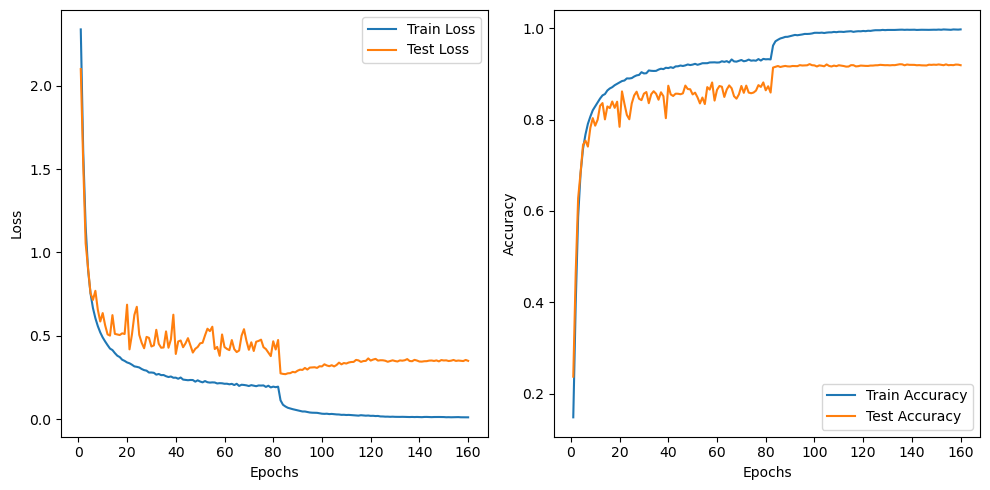

In [41]:
import re
import matplotlib.pyplot as plt
import torch, sys, os

sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname("src"))))

from src.LogViewer import LogViewer


train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

with open('1.txt', 'r') as file:
    for line in file:
        # Extract train loss, train accuracy, test loss, and test accuracy using regular expressions
        if re.search(r"Train : (\d+\.\d+)", line) is None:
            continue
        train_loss = float(re.search(r"Train : (\d+\.\d+)", line).group(1))
        train_acc = float(re.search(r"Train : (\d+\.\d+) / (\d+\.\d+)%", line).group(2))/100
        test_loss = float(re.search(r"Test : (\d+\.\d+)", line).group(1))
        test_acc = float(re.search(r"Test : (\d+\.\d+) / (\d+\.\d+)%", line).group(2))/100

        # Store the values in the respective lists
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
logs = dict()
logs["train_loss"] = train_losses
logs["train_acc"] = train_accuracies
logs["valid_loss"] = 0
logs["valid_acc"] = 0
logs["test_loss"] = test_losses
logs["test_acc"] = test_accuracies
logs["lr_logs"] = 0



IndexError: index 2 is out of bounds for axis 0 with size 2

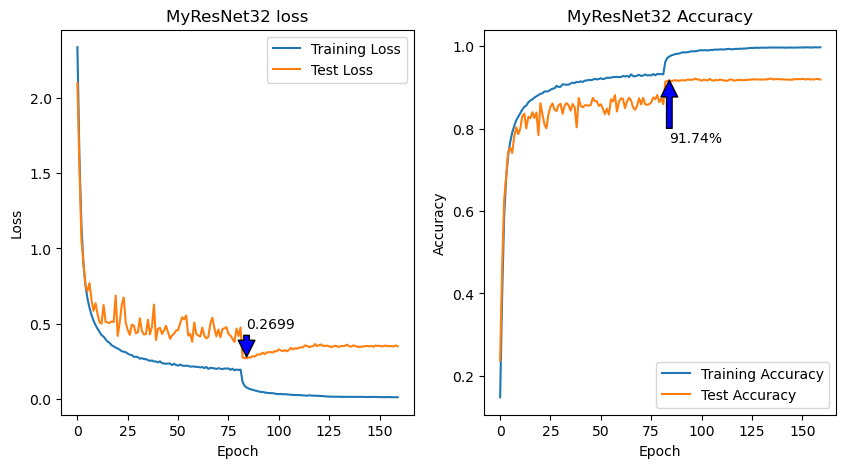

In [43]:
tmp = LogViewer(logs)

tmp.draw(title="MyResNet32", min_marker=True, add_lr_plot=False, save=True)
